<a href="https://colab.research.google.com/github/yawMD/artificial-intelligence-and-machine-learning/blob/master/Copy_of_MaameEsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("/content/final_data.xlsx")
df.head()

,Date,smoothed lake height variation
0,1992-10-04,3.94
1,1992-10-14,4.00
2,1992-10-24,4.18
3,1992-11-03,4.11
4,1992-11-13,999.99


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

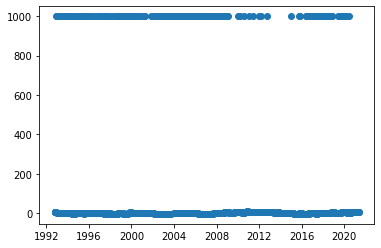

In [ ]:
plt.scatter(df['Date'],df['smoothed lake height variation'])

In [ ]:
X = df[['Date']]

In [ ]:
y = df['smoothed lake height variation']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,Date
78,1994-11-17
573,2007-12-08
992,2018-04-02
1026,2019-03-15
63,1994-06-21
...,...
201,1998-03-30
476,2005-03-31
806,2013-10-29
873,2015-08-24


In [ ]:
X_test

,Date
53,1994-03-14
671,2010-01-29
767,2012-09-07
236,1999-03-22
567,2007-10-10
...,...
144,1996-09-11
24,1993-05-30
1010,2018-09-28
230,1999-01-12


In [ ]:
y_train

78        1.66
573      -0.61
992      -0.28
1026      2.87
63      999.99
         ...  
201      -3.18
476       0.29
806       3.54
873      -2.93
428     999.99
Name: smoothed lake height variation, Length: 774, dtype: float64

In [ ]:
y_test

53      999.99
671     999.99
767       5.15
236      -1.62
567     999.99
         ...  
144       0.12
24        0.44
1010      2.54
230      -0.38
643       2.58
Name: smoothed lake height variation, Length: 333, dtype: float64

In [ ]:
from fbprophet import Prophet
Xnew_df = df.rename(columns={"Date":"ds", "smoothed lake height variation":"y"})

In [ ]:
Xnew_df.head()

,ds,y
0,1992-10-04,3.94
1,1992-10-14,4.00
2,1992-10-24,4.18
3,1992-11-03,4.11
4,1992-11-13,999.99


In [ ]:
m = Prophet()
m.fit(Xnew_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-10-04,193.626465,-319.632279,764.888771,193.626465,193.626465,29.075881,29.075881,29.075881,29.075881,29.075881,29.075881,0.0,0.0,0.0,222.702347
1,1992-10-14,194.031852,-268.569017,826.901491,194.031852,194.031852,101.475015,101.475015,101.475015,101.475015,101.475015,101.475015,0.0,0.0,0.0,295.506867
2,1992-10-24,194.437238,-216.642958,850.404820,194.437238,194.437238,139.325472,139.325472,139.325472,139.325472,139.325472,139.325472,0.0,0.0,0.0,333.762710
3,1992-11-03,194.842625,-150.612658,911.449977,194.842625,194.842625,177.702467,177.702467,177.702467,177.702467,177.702467,177.702467,0.0,0.0,0.0,372.545091
4,1992-11-13,195.248011,-163.188675,877.812170,195.248011,195.248011,143.606220,143.606220,143.606220,143.606220,143.606220,143.606220,0.0,0.0,0.0,338.854230


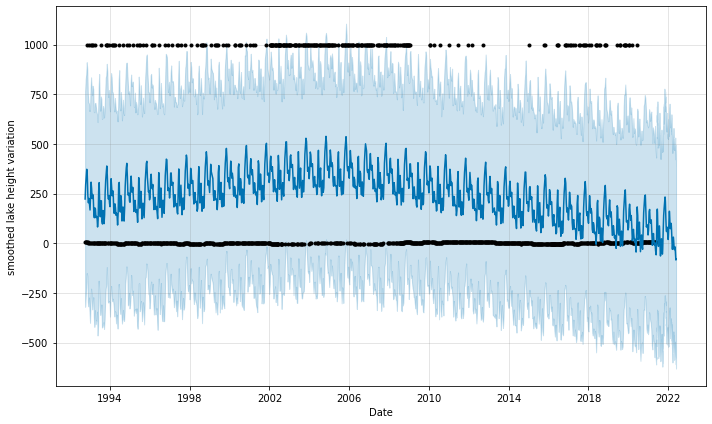

In [ ]:
figure = m.plot(forecast, xlabel="Date", ylabel="smoothed lake height variation")

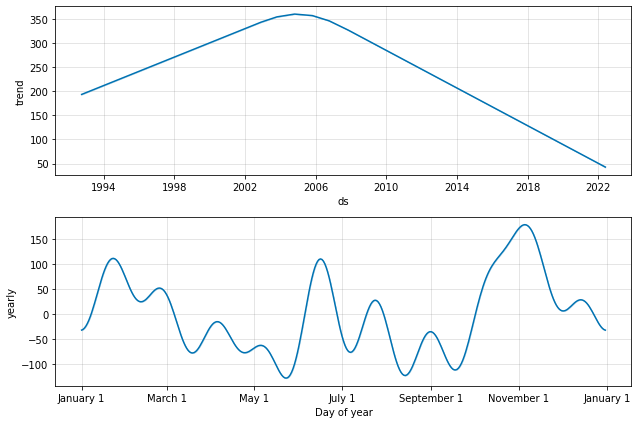

In [ ]:
figure2 = m.plot_components(forecast)